## Data Preperation

In [1]:
#importing the libraries
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

In [2]:
#loading original data
data = pd.read_csv('/kaggle/input/face-to-bmi/data/full.csv')
data.sample(5)

nameid                       name             book_date  \
778   1250412  AARON LESLIE VANDERHEIDEN  7/31/2019 1:32:54 PM   
634   1101217           JORDAN RYAN POPE  7/22/2019 1:06:20 PM   
1295  1265355      MARK ALLEN MENDENHALL  11/7/2019 4:41:46 PM   
661    116267     REGINALD AKEEM JACKSON  7/24/2019 2:21:53 AM   
287    343640        JASON EDWARD KOOKER  6/12/2019 5:19:28 PM   

                city holding_location  age  height  weight   race   sex  \
778        PELLA, IA              PCJ   33  6' 01"     185  White  Male   
634    KNOXVILLE, IA              PCJ   20  6' 06"     165  White  Male   
1295  FORT DODGE, IA              PCJ   47  6' 01"     180  White  Male   
661   DES MOINES, IA              PCJ   29  5' 10"     210  Black  Male   
287   DES MOINES, IA              PCJ   45  5' 09"     290  White  Male   

       eyes    hair  bookid  
778    Blue   Brown  297960  
634   Hazel   Brown  297354  
1295   Blue  Blonde  303825  
661   Brown   Black  297460  
287   Brown   Brown  295117

In [3]:
#converting to SI units
import re
regex_feet = re.compile("([0-9]+)\'")
regex_inches = re.compile("([0-9]+)\"")

def get_numbers(x,regex):
    cap_num = regex.findall(x)
    if len(cap_num) > 0:
        try:
            return int(cap_num[0])
        except:
            return None
    else:
        return None

In [4]:
data['feet'] = data['height'].map(lambda i : get_numbers(i,regex_feet))
data['inches'] = data['height'].map(lambda i : get_numbers(i,regex_inches))
data.loc[data.inches < 12,:]

nameid                     name              book_date            city  \
0        7482      JAMES DEYO ROBINSON  3/10/2017 10:05:55 AM      WAUKEE, IA   
1      754952  CORDERRO ALTON LAURENCE   4/23/2017 8:57:43 AM  DES MOINES, IA   
2      644421      TAYLOR LOUIS HARLAN   12/7/2017 4:00:07 PM  DES MOINES, IA   
3      699804   MALIK TYRONE MANDUJANO    4/1/2018 3:24:44 AM  DES MOINES, IA   
4      238047        DUSTIN GLEN BLACK    8/5/2018 9:26:54 PM  DES MOINES, IA   
...       ...                      ...                    ...             ...   
1550  1260914               EH KLU PAW  11/27/2019 7:11:11 PM       OMAHA, NE   
1551     2365   JEFFERY ALLEN WOLLESEN  11/27/2019 7:41:10 PM  DES MOINES, IA   
1552  1056459      MARCIA LYNN SECREST  11/27/2019 8:18:45 PM  DES MOINES, IA   
1553   235985     KIMBERLY KAY TADAYON  11/27/2019 8:33:35 PM      GRIMES, IA   
1554  1270863    WILLIAM AUSTIN HOLMES  11/27/2019 8:50:34 PM  DES MOINES, IA   

            holding_location  age  height  weight   race     sex   eyes  \
0                        PCJ   54  5' 11"     280  Black    Male  Brown   
1     Cherokee Mental Health   26  5' 11"     210  Black    Male  Brown   
2                        PCJ   24  5' 09"     290  White    Male  Green   
3                        PCJ   21  5' 03"     130  Black    Male  Brown   
4                        PCJ   29  6' 02"     230  White    Male   Blue   
...                      ...  ...     ...     ...    ...     ...    ...   
1550                     PCJ   33  5' 04"     170  Asian    Male  Brown   
1551                     PCJ   50  5' 10"     205  White    Male   Blue   
1552                     PCJ   43  5' 06"     230  White  Female  Brown   
1553                     PCJ   58  5' 02"     200  White  Female   Blue   
1554                     PCJ   52  6' 01"     220  White    Male  Brown   

        hair  bookid  feet  inches  
0      Black  248038   5.0    11.0  
1      Black  250464   5.0    11.0  
2     Blonde  263711   5.0     9.0  
3      Black  270020   5.0     3.0  
4     Blonde  277774   6.0     2.0  
...      ...     ...   ...     ...  
1550     NaN  304911   5.0     4.0  
1551  Blonde  304912   5.0    10.0  
1552   Brown  304913   5.0     6.0  
1553     Red  304914   5.0     2.0  
1554    Gray  304916   6.0     1.0  

[1546 rows x 15 columns]

In [5]:
def show_image(img_path):
    img=Image.open(img_path)
    plt.imshow(img)

In [6]:
#there are some incorrect values for inches 
data.loc[data.inches > 12,:]

nameid                   name              book_date            city  \
31    1083884    CALEB CHARLES RUTAN    1/2/2019 6:27:40 AM  DES MOINES, IA   
456    912542   HUSSEIN NKUSU TAMBWE   7/4/2019 10:40:46 AM   URBANDALE, IA   
566   1169382    JULIANNE JO BECKETT   7/15/2019 4:50:55 PM   KNOXVILLE, IA   
622   1227456      ANDREW LANTA BOYD   7/19/2019 8:11:17 AM  DES MOINES, IA   
640    877215     SIOUX HAWK HOFFNER   7/22/2019 6:51:56 PM  DES MOINES, IA   
671   1051124   JASON ALLAN BROWNING   7/24/2019 6:10:24 PM   URBANDALE, IA   
1068  1012250  DARRYL ANTHONY HISHAW   10/6/2019 4:48:50 PM  DES MOINES, IA   
1192  1170588               KAY  SAW  10/27/2019 4:21:49 PM  DES MOINES, IA   

     holding_location  age  height  weight              race     sex   eyes  \
31                PCJ   48  6' 63"     200             White    Male  Brown   
456               PCJ   24  5' 57"     175             Black    Male  Brown   
566               PCJ   20  5' 59"     350             White  Female  Hazel   
622               PCJ   35  5' 59"       0             Black    Male  Brown   
640               PCJ   24  4' 49"      90  Pacific Islander  Female  Brown   
671               PCJ   41  6' 60"     205             White    Male  Green   
1068              PCJ   26  5' 56"     145             Black    Male  Brown   
1192              PCJ   22  5' 54"     120             Asian    Male  Brown   

       hair  bookid  feet  inches  
31     Gray  287593   6.0    63.0  
456   Black  296374   5.0    57.0  
566   Brown  296977   5.0    59.0  
622   Black  297206   5.0    59.0  
640   Brown  297380   4.0    49.0  
671   Brown  297503   6.0    60.0  
1068  Black  301966   5.0    56.0  
1192  Black  303124   5.0    54.0

In [7]:
# found some incorrect inches, assume 63" to 6.3"
data['inches'] = data['inches'].map(lambda i: i / 10 if i > 12 else i)
# convert feet/inches to inches
data['height'] = data.apply(lambda row: row['feet'] * 12 + row['inches'], axis=1)
# covert inches to m
data['height'] = data['height'].map(lambda i: i * 2.54 / 100)
# weight pounds => kg
data['weight'] = data['weight'].map(lambda i: i * 0.453592)
# calculate BMI = weight/height^2
data['bmi'] = data.apply(lambda row: row['weight'] / row['height'] / row['height'], axis = 1)
# create gender (number format of sex)
data['gender'] = data['sex'].map(lambda i: 1 if i == 'Male' else 0)
data[['nameid','age','height','weight','race','sex','eyes','hair', 'bmi']].head()

nameid  age  height     weight   race   sex   eyes    hair        bmi
0    7482   54  1.8034  127.00576  Black  Male  Brown   Black  39.051641
1  754952   26  1.8034   95.25432  Black  Male  Brown   Black  29.288731
2  644421   24  1.7526  131.54168  White  Male  Green  Blonde  42.825039
3  699804   21  1.6002   58.96696  Black  Male  Brown   Black  23.028211
4  238047   29  1.8796  104.32616  White  Male   Blue  Blonde  29.529925

## Descriptive Analysis

In [8]:
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["font.size"] = 12
plt.rcParams["axes.labelsize"] = 12

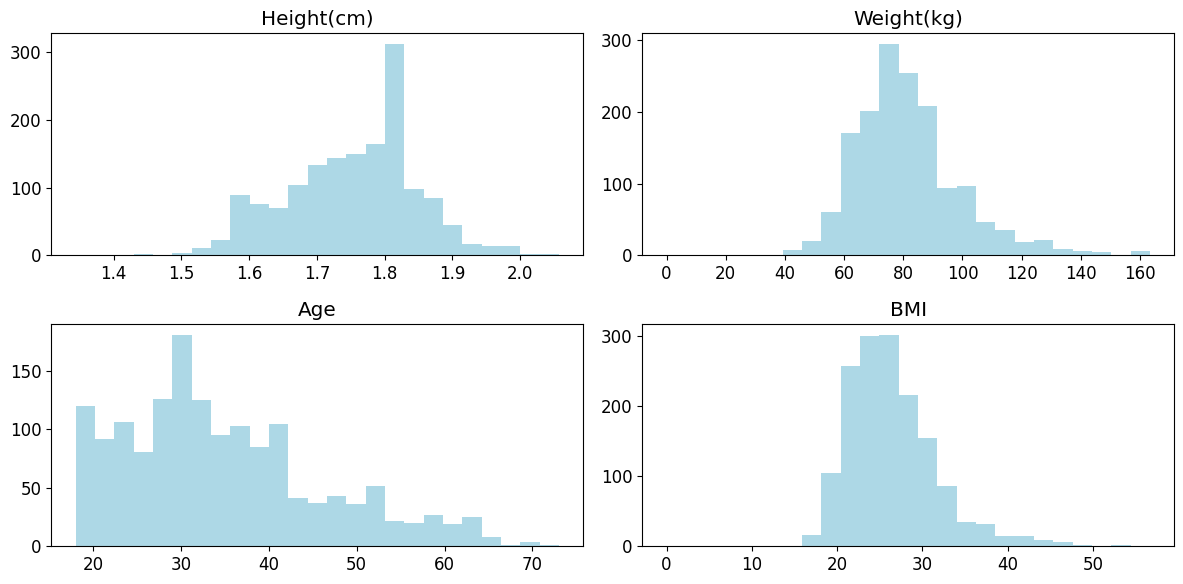

In [9]:
def ax_subplot(ax, x, title, bins = 25, color = 'lightblue'):
    x = x[~x.isnull()]
    ax.hist(x, bins = bins, color = color)
    ax.set_title(title)

fig, ax = plt.subplots(2,2)
ax_subplot(ax[0,0], data.height, 'Height(cm)')
ax_subplot(ax[0,1], data.weight, 'Weight(kg)')
ax_subplot(ax[1,0], data.age, 'Age')
ax_subplot(ax[1,1], data.bmi, 'BMI')
plt.tight_layout()
plt.show()

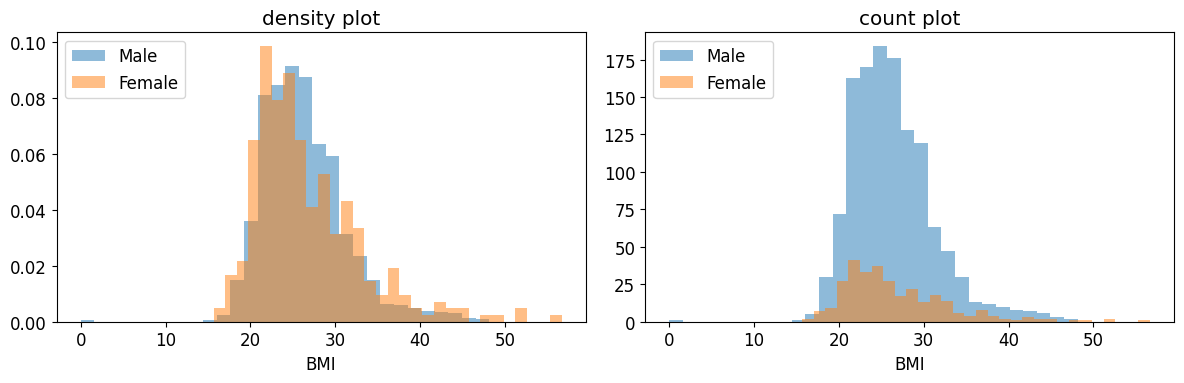

In [10]:
#BMI density by gender
fig, ax = plt.subplots(1,2,sharex=True)
fig.set_size_inches(12,4)
options = {'density plot': True, 'count plot': False}

for i, (title, normed) in enumerate(options.items()):

    for sex in ['Male','Female']:
        ax[i].hist(data.loc[(data.sex == sex) & (~data.bmi.isnull()),'bmi'].values, label = sex, alpha = 0.5,
                 bins = 30, density = normed)
        ax[i].set_title(title)
        ax[i].set_xlabel('BMI')
        ax[i].legend(loc = 'upper left')

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='count', ylabel='race'>

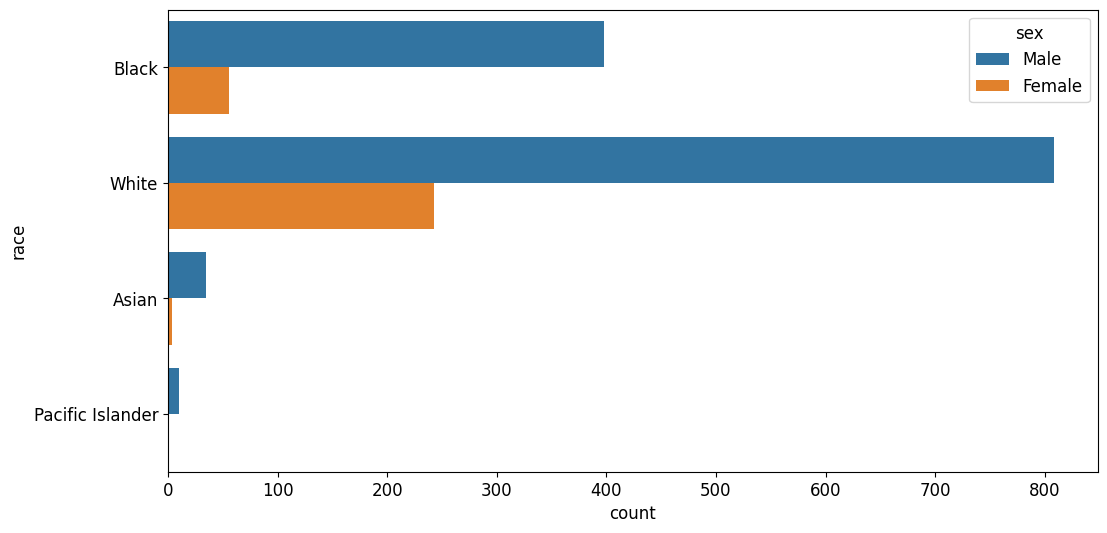

In [11]:
#data imbalance
import seaborn as sns
sns.countplot(y = 'race' ,data = data, hue = 'sex')

In [12]:
#train test split
import os
import numpy as np
# remove rows that has no face images
data['index'] = data['bookid'].map(lambda i: str(i) +'.jpg')
allimage = os.listdir('/kaggle/input/face-to-bmi/data/face')
data = data.loc[data['index'].isin(allimage),:]

# remove rows with invalid BMI
data = data.loc[~data['bmi'].isnull(), :]

# split train/valid
in_train = np.random.random(size = len(data)) <= 0.8
train = data.loc[in_train,:]
test = data.loc[~in_train,:]

print('train data dimension: {}'.format(str(train.shape)))
print('test data dimension:  {}'.format(str(test.shape)))

train data dimension: (1247, 18)
test data dimension:  (296, 18)


In [13]:
train.to_csv('/kaggle/working/train.csv')
test.to_csv('/kaggle/working/test.csv')

In [14]:
!pip install keras_applications

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.7 MB/s eta 0:00:00


In [15]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 35.6 MB/s eta 0:00:00a 0:00:01


In [16]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [17]:
import cv2
import os
from mtcnn.mtcnn import MTCNN

test_dir = '/kaggle/input/face-to-bmi/data/test/single_face/'
train_dir = '/kaggle/input/face-to-bmi/data/face'
test_processed_dir = '/kaggle/input/face-to-bmi/data/test/test_aligned'
train_processed_dir = '/kaggle/input/face-to-bmi/data/face_aligned'
os.listdir(test_dir)

['leonardo.jpeg',
 'person.jpg',
 'Aishwarya Rai.jpg',
 'kent_zheng.jpg',
 'bill-gates.jpg',
 'Shahrukh Khan.jpg',
 'xi.jpg',
 'Kim Jong-un.jpg',
 'hilary_clinton.jpg',
 'emma_watson.jpg',
 'Tom Cruise.jpg',
 'trump.jpg',
 'Joe Biden.jpg',
 'albert-einstein.jpg',
 'barack-obama.jpg']

In [18]:
img = cv2.cvtColor(cv2.imread(test_dir + 'trump.jpg'), cv2.COLOR_BGR2RGB)
detector = MTCNN()
print(detector.detect_faces(img))
box = detector.detect_faces(img)[0]

1/1 [==============================] - 0s 219ms/step
[{'box': [355, 75, 266, 347], 'confidence': 0.9983004927635193, 'keypoints': {'left_eye': (432, 209), 'right_eye': (551, 208), 'nose': (492, 276), 'mouth_left': (445, 346), 'mouth_right': (544, 347)}}]
1/1 [==============================] - 0s 19ms/step


In [19]:
!pip install keras_vggface

In [20]:
from keras.preprocessing import image
from keras.utils.layer_utils import get_source_inputs
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import keras.utils as image
import numpy as np
from PIL import Image

def crop_img(im,x,y,w,h):
    return im[y:(y+h),x:(x+w),:]

def detect_face(face_path):
    img = cv2.cvtColor(cv2.imread(face_path), cv2.COLOR_BGR2RGB)
    box = detector.detect_faces(img)[0]
    return box

def detect_faces(face_path):
    #img = cv2.cvtColor(cv2.imread(face_path), cv2.COLOR_BGR2RGB)
    img = image.load_img(face_path)
    img = image.img_to_array(img)
    box = detector.detect_faces(img)
    return box

def draw_box(face_path = './test/albert-einstein.jpg', plot = True):

    boxes = detect_faces(face_path)
    im = np.array(Image.open(face_path), dtype=np.uint8)

    if plot:
        # Create figure and axes
        num_box = len(boxes)
        fig,ax = plt.subplots(1, (1 + num_box))
        fig.set_size_inches(4 * (1 + num_box),4)
        # Display the image
        ax[0].imshow(im)
        ax[0].axis('off')
        # Create a Rectangle patch
        for idx, box in enumerate(boxes):
            box_x, box_y, box_w, box_h = box['box']
            rect = patches.Rectangle((box_x, box_y), box_w, box_h, linewidth=1,edgecolor='r',facecolor='none')
            ax[0].add_patch(rect)
            ax[0].text(box_x, box_y, '{:3.2f}'.format(box['confidence']))
            for i in box['keypoints'].keys():
                circle = patches.Circle(box['keypoints'][i], radius = 5, color = 'red')
                ax[0].add_patch(circle)
            ax[1 + idx].imshow(crop_img(im, *box['box']))
            ax[1 + idx].axis('off')
        plt.show()

    res = [crop_img(im, *box['box']) for box in boxes]
    return res

1/1 [==============================] - 0s 108ms/step


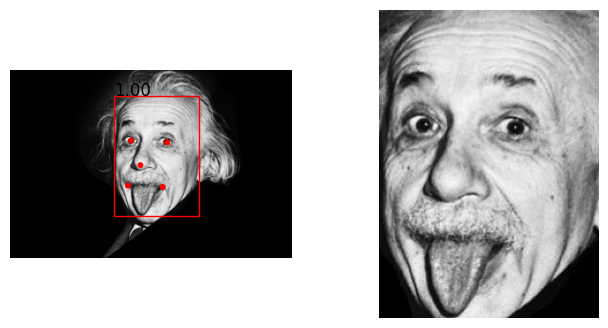

In [21]:
res = draw_box(test_dir + 'albert-einstein.jpg')

1/1 [==============================] - 0s 108ms/step


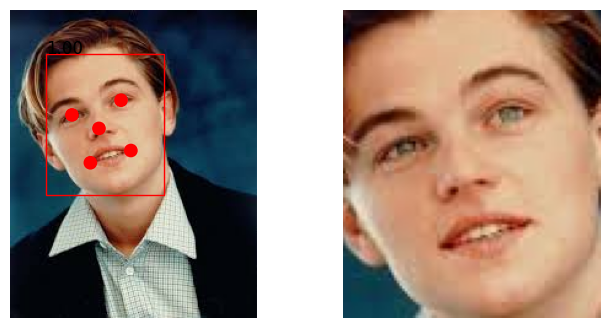

1/1 [==============================] - 0s 108ms/step


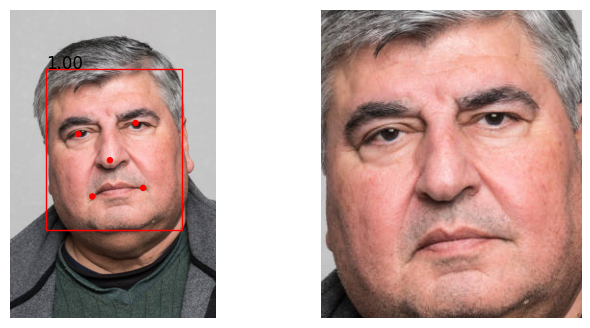

1/1 [==============================] - 0s 109ms/step


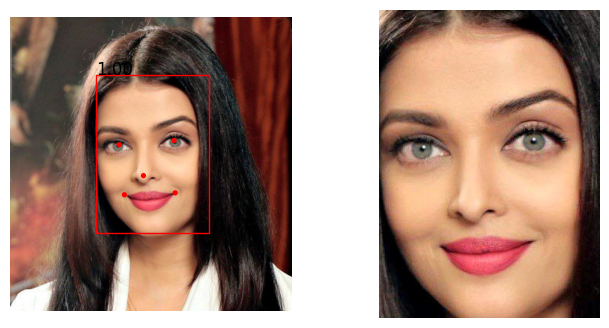

In [22]:
for img in os.listdir(test_dir)[:3]:
    draw_box(test_dir + img)

## Pre processing the test images

In [23]:
from tqdm.notebook import tqdm
import shutil
test_processed_dir = '/kaggle/working/test_processed_dir/'
if os.path.exists(test_processed_dir):
    shutil.rmtree(test_processed_dir)
os.mkdir("/kaggle/working/test_processed_dir")
for img in tqdm(os.listdir(test_dir)):
    box = detect_face(test_dir+img)
    im = plt.imread(test_dir+img)
    cropped = crop_img(im, *box['box'])
    plt.imsave(test_processed_dir+img, crop_img(im, *box['box']))

  0%|          | 0/15 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


In [24]:
def cut_negative_boundary(box):
    res = []
    for x in box['box']:
        if x < 0:
            x = 0
        res.append(x)
    box['box'] = res
    return box
i_m = Image.open(os.path.join(train_dir+'/'+ '304916.jpg'))
plt.imshow(i_m)

In [29]:
from tqdm.notebook import tqdm
import shutil
# os.remove(os.path.join(train_dir+'/'+ '304916.jpg'))  uncomment this before starting the loop remove this image it has no face in it
train_processed_dir = '/kaggle/working/train_processed_dir/'
if os.path.exists(train_processed_dir):
    print('train dir already exist')
else:
    os.mkdir(train_processed_dir)

for img in tqdm(os.listdir(train_dir)):
    if img == '304916.jpg':   #image with no face
        continue
    else:
        box = detect_face(train_dir+'/'+img)
        box = cut_negative_boundary(box)
        im = plt.imread(train_dir+'/'+img)
        cropped = crop_img(im, *box['box'])
        plt.imsave(train_processed_dir+'/'+img, cropped)

  0%|          | 0/1544 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 20ms/step


In [93]:
processed_data = os.listdir('/kaggle/working/train_processed_dir')

In [98]:
for img in tqdm(os.listdir(train_dir)):
    if img == '304916.jpg':
        continue
    elif img in processed_data:
        continue
    elif img not in processed_data:
        box = detect_face(train_dir+'/'+img)
        box = cut_negative_boundary(box)
        im = plt.imread(train_dir+'/'+img)
        cropped = crop_img(im, *box['box'])
        plt.imsave(train_processed_dir+'/'+img, cropped)

  0%|          | 0/1544 [00:00<?, ?it/s]

1/1 [==============================] - 0s 31ms/step


In [30]:
mode = 'train' #'train' or 'predict'
model_type = 'vgg16'
model_tag = 'base'
model_id = '{:s}_{:s}'.format(model_type, model_tag)
model_dir = './kaggle/working/saved_model/model_{:s}.h5'.format(model_id)
bs = 8
epochs = 10
freeze_backbone = True # True => transfer learning; False => train from scratch

In [31]:
!pip install keras_vggface

In [32]:
!pip install 'keras==2.1.6' --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 339.6/339.6 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 62.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 35.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.5/705.5 kB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 83.4 MB/s eta 0:00:00:00:01
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.2
    Uninstalling scipy-1.11.2:
      Successfully unins

In [33]:
#face detection
#VGG16 Model
# keras vggface model
import tensorflow as tf
from tensorflow.keras.models import Model
from keras.layers import Flatten, Dense, Input, Dropout, Activation, BatchNormalization
from keras.utils.layer_utils import get_source_inputs
from keras_vggface.vggface import VGGFace
from keras_vggface import utils
import keras.utils as image

# image manipulation
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import cv2

# face alignment
from mtcnn.mtcnn import MTCNN

# model metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr

# common packages
import os
import numpy as np
import pandas as pd

In [34]:
import tensorflow.python.keras.engine

In [35]:
def rmse(x,y):
    return np.sqrt(mean_squared_error(x,y))

def mae(x,y):
    return mean_absolute_error(x,y)

def cor(x,y):
    return pearsonr(x,y)[0]

def auc(label, pred):
    return roc_auc_score(label, pred)

def imgs2arr(img_names, img_dir, version = 1):
    """ convert images to mutli-dimensional array
    Args:
        @img_names: image names (e.g. [pic001.png])
        @img_dir: directory of the images (e.g. ./tmp)
        @version: for vggface model preprocessing
    Return:
        np.array
    """
    imgs = []
    for img in img_names:
        imgs += [img2arr(os.path.join(img_dir,img), version)]
    return np.concatenate(imgs)

def process_arr(arr, version):
    """process array (resize, mean-substract)
    Args:
        @arr: np.array
    Return:
        np.array
    """
    img = cv2.resize(arr, (224, 224))
    img = np.expand_dims(img, 0)
    img = utils.preprocess_input(img, version = version)
    return img

def img2arr(img_path, version):
    """convert single image to array
    Args:
        @img_path: full path of the image (e.g. ./tmp/pic001.png)
    Return:
        np.array
    """
    img = image.load_img(img_path)
    img = image.img_to_array(img)
    img = process_arr(img, version)
    return img

def crop_img(im,x,y,w,h):
    return im[y:(y+h),x:(x+w),:]

def input_generator(data, bs, img_dir, is_train = True, version = 1):
    """data input pipeline
    Args:
    @data: dataframe
    @bs: batch size
    @img_dir: dir of saved images
    @is_train: train/valid [sample] or test [sequential]
    """
    sex_map = {'Male':1, 'Female':0}
    loop = True

    while loop:
        if is_train:
            sampled = data.sample(bs)
            x = imgs2arr(sampled['index'],img_dir, version)
            y = [sampled['bmi'].values, sampled['age'].values, sampled['sex'].map(lambda i: sex_map.get(i,0)).values]
            res = (x,y)
        else:
            if len(data) >= bs:
                sampled = data.iloc[:bs,:]
                data = data.iloc[bs:,:]
                res = imgs2arr(sampled['index'],img_dir, version)
            else:
                loop = False
        yield res

In [36]:
class FacePrediction(object):

    def __init__(self, img_dir, model_type = 'vgg16', sex_thresh = 0.05):
        self.model_type = model_type
        self.img_dir = img_dir
        self.detector = MTCNN()
        self.sex_thresh = sex_thresh
        if model_type in ['vgg16','vgg16_fc6']:
            self.version = 1
        else:
            self.version = 2

    def define_model(self, hidden_dim = 128, drop_rate=0.0, freeze_backbone = True):

        if self.model_type == 'vgg16_fc6':
            vgg_model = VGGFace(model = 'vgg16', include_top=True, input_shape=(224, 224, 3))
            last_layer = vgg_model.get_layer('fc6').output
            flatten = Activation('relu')(last_layer)
        else:
            vgg_model = VGGFace(model = self.model_type, include_top=False, input_shape=(224, 224, 3))
            last_layer = vgg_model.output
            flatten = Flatten()(last_layer)

        if freeze_backbone:
            for layer in vgg_model.layers:
                layer.trainable = False

        def block(flatten, name):
            x = Dense(hidden_dim, name=name + '_fc1')(flatten)
            x = BatchNormalization(name = name + '_bn1')(x)
            x = Activation('relu', name = name+'_act1')(x)
            x = Dropout(drop_rate)(x)
            x = Dense(hidden_dim, name=name + '_fc2')(x)
            x = BatchNormalization(name = name + '_bn2')(x)
            x = Activation('relu', name = name+'_act2')(x)
            x = Dropout(drop_rate)(x)
            return x

        x = block(flatten, name = 'bmi')
        out_bmi = Dense(1, activation='linear', name='bmi')(x)

        x = block(flatten, name = 'age')
        out_age = Dense(1, activation='linear', name='age')(x)

        x = block(flatten, name = 'sex')
        out_sex = Dense(1, activation = 'sigmoid', name = 'sex')(x)

        custom_vgg_model = Model(vgg_model.input, [out_bmi, out_age, out_sex])
        custom_vgg_model.compile('adam',
                                 {'bmi':'mae','age':'mae','sex':'binary_crossentropy'},
                                 {'sex': 'accuracy'},
                                 loss_weights={'bmi': 0.8, 'age':0.1, 'sex':0.1})

        self.model = custom_vgg_model


    def train(self, train_data, valid_data, bs, epochs, callbacks):
        train_gen = input_generator(train_data, bs, self.img_dir, True, self.version)
        valid_gen = input_generator(valid_data, bs, self.img_dir, True, self.version)
        self.model.fit_generator(train_gen, len(train_data) // bs, epochs,
                                 validation_data = valid_gen,
                                 validation_steps = len(valid_data) //  bs,
                                 callbacks=callbacks)

    def evaulate(self, valid_data):
        imgs = valid_data['index'].values
        arr = imgs2arr(imgs, self.img_dir, self.version)
        bmi, age, sex = self.model.predict(arr)
        metrics = {'bmi_mae':mae(bmi[:,0], valid_data.bmi.values),
                   'bmi_cor':cor(bmi[:,0], valid_data.bmi.values),
                   'age_mae':mae(age[:,0], valid_data.age.values),
                   'sex_auc':auc(valid_data.gender, sex[:,0])}
        return metrics

    def save_weights(self, model_dir):
        self.model.save_weights(model_dir)

    def load_weights(self, model_dir):
        self.model.load_weights(model_dir)

    def detect_faces(self, face_path, confidence):
        img = image.load_img(face_path)
        img = image.img_to_array(img)
        box = self.detector.detect_faces(img)
        box = [i for i in box if i['confidence'] > confidence]
        res = [crop_img(img, *i['box']) for i in box]
        res = [process_arr(i, self.version) for i in res]
        return box, res

    def predict(self, img_dir, show_img = False):
        if os.path.isdir(img_dir):
            imgs = os.listdir(img_dir)
            arr = imgs2arr(imgs, img_dir, self.version)
        else:
            arr = img2arr(img_dir, self.version)
        preds = self.model.predict(arr)

        if show_img and os.path.isdir(img_dir):
            bmi, age, sex = preds
            num_plots = len(imgs)
            ncols = 5
            nrows = int((num_plots - 0.1) // ncols + 1)
            fig, axs = plt.subplots(nrows, ncols)
            fig.set_size_inches(3 * ncols, 3 * nrows)
            for i, img in enumerate(imgs):
                col = i % ncols
                row = i // ncols
                axs[row, col].imshow(plt.imread(os.path.join(img_dir,img)))
                axs[row, col].axis('off')
                axs[row, col].set_title('BMI: {:3.1f} AGE: {:02.0f} SEX: {:2.1f}'.format(bmi[i,0], age[i,0], sex[i,0]), fontsize = 10)

        return preds

    def predict_df(self, img_dir):
        assert os.path.isdir(img_dir), 'input must be directory'
        fnames = os.listdir(img_dir)
        bmi, age, sex = self.predict(img_dir)
        res = pd.DataFrame({'img':fnames, 'bmi':bmi[:,0], 'age':age[:,0], 'sex':sex[:,0]})
        res['sex_prob'] = res['sex']
        res['sex'] = res['sex'].map(lambda i: 'Male' if i > self.sex_thresh else 'Female')

        return res

    def predict_faces(self, img_path, show_img = True, color = "white", fontsize = 12,
                      confidence = 0.95, fig_size = (16,12)):

        assert os.path.isfile(img_path), 'only single image is supported'
        img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
        boxes, faces = self.detect_faces(img_path, confidence)
        preds = [self.model.predict(face) for face in faces]

        if show_img:
            # Create figure and axes
            num_box = len(boxes)
            fig,ax = plt.subplots()
            fig.set_size_inches(fig_size)
            # Display the image
            ax.imshow(img)
            ax.axis('off')
            # Create a Rectangle patch
            for idx, box in enumerate(boxes):
                bmi, age, sex = preds[idx]
                box_x, box_y, box_w, box_h = box['box']
                rect = patches.Rectangle((box_x, box_y), box_w, box_h, linewidth=1,edgecolor='r',facecolor='none')
                ax.add_patch(rect)
                ax.text(box_x, box_y,
                        'BMI:{:3.1f}\nAGE:{:02.0f}\nSEX:{:s}'.format(bmi[0,0], age[0,0], 'M' if sex[0,0] > self.sex_thresh else 'F'),
                       color = color, fontsize = fontsize)
            plt.show()

        return preds

In [37]:
!git clone https://github.com/rcmalli/keras-vggface.git

Cloning into 'keras-vggface'...
remote: Enumerating objects: 286, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 286 (delta 0), reused 1 (delta 0), pack-reused 284
Receiving objects: 100% (286/286), 6.03 MiB | 30.13 MiB/s, done.
Resolving deltas: 100% (136/136), done.


In [38]:
allimages = os.listdir('/kaggle/input/face-to-bmi/data/face_aligned')
train = pd.read_csv('/kaggle/working/train.csv')
valid = pd.read_csv('/kaggle/working/test.csv')

train = train.loc[train['index'].isin(allimages)]
valid = valid.loc[valid['index'].isin(allimages)]

In [39]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
es = EarlyStopping(patience=3)
ckp = ModelCheckpoint(model_dir, save_best_only=True, save_weights_only=True, verbose=1)
tb = TensorBoard('./tb/%s'%(model_id))
callbacks = [es, ckp]

model = FacePrediction(img_dir = '/kaggle/input/face-to-bmi/data/face_aligned', model_type = model_type)
model.define_model(freeze_backbone = freeze_backbone)
model.model.summary()
if mode == 'train':
    model_history = model.train(train, valid, bs = bs, epochs = epochs, callbacks = callbacks)
else:
    model.load_weights(model_dir)

58909280/58909280 [==============================] - 1s 0us/step
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_1 (Conv2D)               (None, 224, 224, 64  1792        ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_2 (Conv2D)               (None, 224, 224, 64  36928       ['conv1_1[0][0]']                
                           

/tmp/ipykernel_32/3155222815.py:60: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  self.model.fit_generator(train_gen, len(train_data) // bs, epochs,


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <bound method _BaseOptimizer._update_step_xla of <tensorflow.python.eager.polymorphic_function.tracing_compiler.TfMethodTarget object at 0x7c80703fc1c0>>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
154/155 [===============

In [40]:
valid['gender'] = valid.sex.map(lambda i: 1 if i == 'Male' else 0)
metrics = model.evaulate(valid)

10/10 [==============================] - 6s 115ms/step


In [47]:
metrics

{'bmi_mae': 3.6627381804267416,
 'bmi_cor': 0.45248773116468205,
 'age_mae': 4.403705564705101,
 'sex_auc': 0.9980487804878049,
 'model': 'vgg16'}

In [51]:
import glob
import json
metrics['model'] = model_type
pd.DataFrame([metrics])

bmi_mae   bmi_cor   age_mae   sex_auc  model
0  3.662738  0.452488  4.403706  0.998049  vgg16

In [52]:
#predict from a single facial image
model.predict('/kaggle/input/face-to-bmi/data/test/test_aligned/xi.jpg')

1/1 [==============================] - 1s 631ms/step


[array([[32.19017]], dtype=float32),
 array([[54.30954]], dtype=float32),
 array([[0.06027626]], dtype=float32)]

1/1 [==============================] - 0s 23ms/step


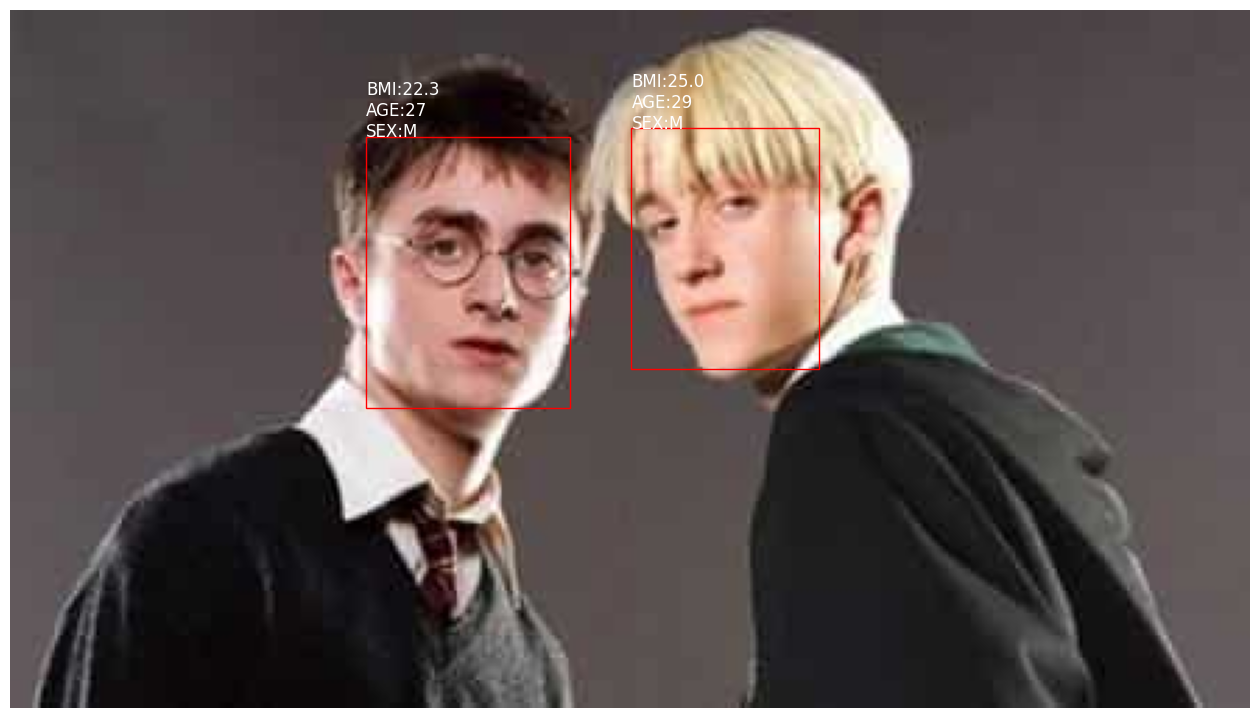

[[array([[22.331697]], dtype=float32),
  array([[26.751858]], dtype=float32),
  array([[0.5875156]], dtype=float32)],
 [array([[25.040201]], dtype=float32),
  array([[28.6599]], dtype=float32),
  array([[0.21876603]], dtype=float32)]]

In [53]:
model.predict_faces('/kaggle/input/face-to-bmi/data/test/multi_face/Harry.jpg', color = 'white')

1/1 [==============================] - 0s 22ms/step


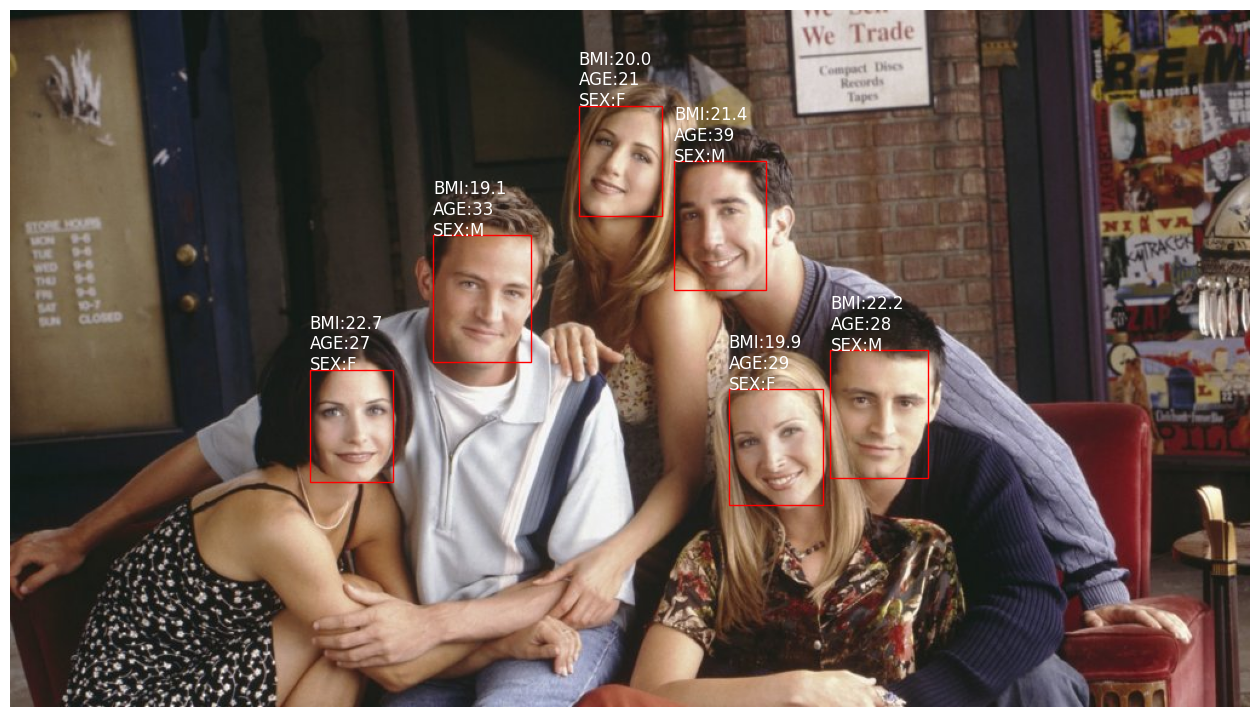

In [54]:
multi_face = model.predict_faces('/kaggle/input/face-to-bmi/data/test/multi_face/friends.jpg',color='white')

In [55]:
#modify model
# keras vggface model
import tensorflow as tf
from tensorflow.keras.models import Model
from keras.layers import Flatten, Dense, Input, Dropout, Activation, BatchNormalization, Add
from keras.utils.layer_utils import get_source_inputs
from keras_vggface.vggface import VGGFace
from keras_vggface import utils
import keras.utils as image

class FP_MT(FacePrediction):

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def define_model(self, hidden_dim = 128, drop_rate=0.0, freeze_backbone = True):

        if self.model_type == 'vgg16_fc6':
            vgg_model = VGGFace(model = 'vgg16', include_top=True, input_shape=(224, 224, 3))
            last_layer = vgg_model.get_layer('fc6').output
            flatten = Activation('relu')(last_layer)
        else:
            vgg_model = VGGFace(model = self.model_type, include_top=False, input_shape=(224, 224, 3))
            last_layer = vgg_model.output
            flatten = Flatten()(last_layer)

        if freeze_backbone:
            for layer in vgg_model.layers:
                layer.trainable = False

        def block(flatten, name):
            x = Dense(hidden_dim, name=name + '_fc1')(flatten)
            x = BatchNormalization(name = name + '_bn1')(x)
            x = Activation('relu', name = name+'_act1')(x)
            x = Dropout(drop_rate)(x)
            x = Dense(hidden_dim, name=name + '_fc2')(x)
            x = BatchNormalization(name = name + '_bn2')(x)
            x = Activation('relu', name = name+'_act2')(x)
            x = Dropout(drop_rate)(x)
            return x

        x = block(flatten, name = 'sex')
        out_sex = Dense(1, activation = 'sigmoid', name = 'sex')(x)

        # residual connection to age
        x1 = Dense(hidden_dim)(flatten)
        x1 = Add()([x1, x])
        x1 = block(x1, name = 'age')
        out_age = Dense(1, activation='linear', name='age')(x1)

        # residual connection to bmi
        x2 = Dense(hidden_dim)(flatten)
        x2 = Add()([x2, x])
        x2 = block(x2, name = 'bmi')
        out_bmi = Dense(1, activation='linear', name='bmi')(x2)

        custom_vgg_model = Model(vgg_model.input, [out_bmi, out_age, out_sex])
        custom_vgg_model.compile('adam',
                                 {'bmi':'mae','age':'mae','sex':'binary_crossentropy'},
                                 {'sex': 'accuracy'},
                                 loss_weights={'bmi': 0.8, 'age':0.1, 'sex':0.1})

        self.model = custom_vgg_model

In [57]:
es = EarlyStopping(patience=3)
ckp = ModelCheckpoint(model_dir, save_best_only=True, save_weights_only=True, verbose=1)
tb = TensorBoard('./tb/%s'%(model_type))
callbacks = [es, ckp, tb]

model = FP_MT(img_dir = '/kaggle/input/face-to-bmi/data/face_aligned', model_type = model_type)
model.define_model(freeze_backbone = freeze_backbone)
model.model.summary()
if mode == 'train':
    model.train(train, valid, bs = bs, epochs = 20, callbacks = callbacks)
else:
    model.load_weights(model_dir)

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_1 (Conv2D)               (None, 224, 224, 64  1792        ['input_15[0][0]']               
                                )                                                                 
                                                                                                  
 conv1_2 (Conv2D)               (None, 224, 224, 64  36928       ['conv1_1[0][0]']                
                                )                                                          

/tmp/ipykernel_32/3155222815.py:60: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  self.model.fit_generator(train_gen, len(train_data) // bs, epochs,


155/155 [==============================] - ETA: 0s - loss: 19.3246 - bmi_loss: 20.5691 - age_loss: 28.5443 - sex_loss: 0.1490 - sex_accuracy: 0.9500WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7c80620dc820> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert

Epoch 1: val_loss improved from inf to 11.14391, saving model to ./kaggle/working/saved_model/model_vgg16_base.h5
155/155 [==============================] - 17s 73ms/step - loss: 19.3246 - bmi_loss: 20.5691 - age_loss: 28.5443 - sex_loss: 0.1490 - sex_accuracy: 0.9500 - val_loss: 11.1439 - val_bmi_loss: 11.2935 - val_age_loss: 20.9901 - val_sex_loss: 0.1009 - val_sex

In [58]:
metrics = model.evaulate(valid)
metrics['model'] = model_id
pd.DataFrame([metrics])

10/10 [==============================] - 1s 120ms/step


bmi_mae   bmi_cor   age_mae   sex_auc       model
0  3.916349  0.350976  4.371343  0.998374  vgg16_base

1/1 [==============================] - 0s 19ms/step


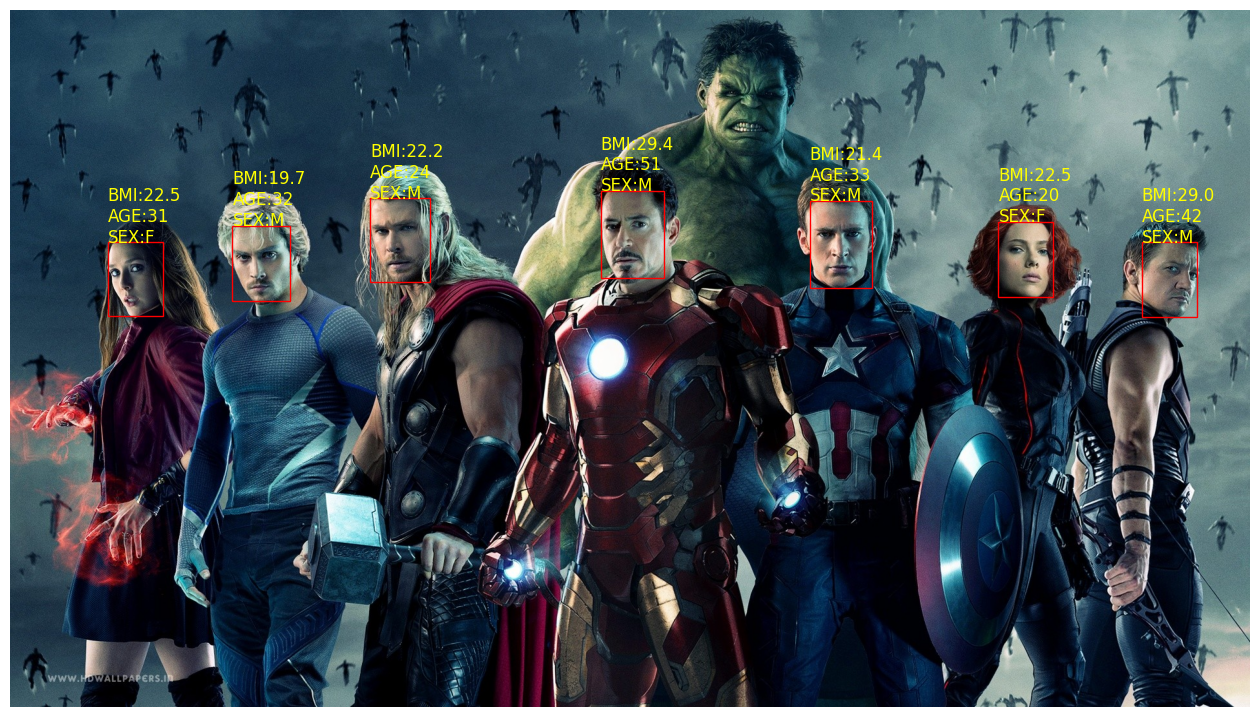

[[array([[29.04865]], dtype=float32),
  array([[41.702477]], dtype=float32),
  array([[0.4986983]], dtype=float32)],
 [array([[19.703165]], dtype=float32),
  array([[31.72686]], dtype=float32),
  array([[0.9992473]], dtype=float32)],
 [array([[21.379717]], dtype=float32),
  array([[32.757404]], dtype=float32),
  array([[0.71099]], dtype=float32)],
 [array([[22.53498]], dtype=float32),
  array([[20.028513]], dtype=float32),
  array([[0.00438517]], dtype=float32)],
 [array([[22.190678]], dtype=float32),
  array([[24.21191]], dtype=float32),
  array([[0.9957457]], dtype=float32)],
 [array([[22.481508]], dtype=float32),
  array([[30.540558]], dtype=float32),
  array([[0.00272044]], dtype=float32)],
 [array([[29.396437]], dtype=float32),
  array([[51.214947]], dtype=float32),
  array([[0.99983466]], dtype=float32)]]

In [59]:
model.predict_faces('/kaggle/input/face-to-bmi/data/test/multi_face/avengers.jpg',color='yellow')